# <span style='color:#FE774C'>OBIS</span> Example Notebook

In [1]:
import odp.geospatial as odp

import warnings

warnings.filterwarnings("ignore")

In [2]:
db = odp.Database()
db_plt = odp.PlotTools()

In [3]:
db.datasets

,schema,table,labels
name,,,
OBIS Biodiversity,raw_obis,occurrences,"[biology, ecosystem, occurrence, organisms]"
World Registry of Marine Species,raw_worms,taxa,"[biology, organisms, ecosystem]"
InterRidge hydrothermal vents,raw_interridge,vents,"[geology, vents]"
OceanLab,raw_oceanlabs,trondheim_buoy,"[physics, wind, atmosphere, pressure, temperat..."
vessel_emissions_2020_h3,vessel_emissions_map,emissions_map_2020_h3_month_class,"[human dimensions, estimated, emissions, human..."
vessel_emissions_2020_h4,vessel_emissions_map,emissions_map_2020_h4_month_class,"[human dimensions, estimated, emissions, human..."
vessel_emissions_2020_h5,vessel_emissions_map,emissions_map_2020_h5_month_class,"[human dimensions, estimated, emissions, human..."
lusedata,raw_ops_seafood,joined_salmon_lice_data,"[aquaculture, fish farms]"
World Seas IHO,raw_marineregions,world_seas_iho_v3,[marine boundaries]


## Pulling data - <span style='color:#FE774C'> **Ocean Biodiversity Information System** </span>


#### Insert the name of the table you are interested in into the query function, and let's limit to 10 just to see what it looks like

In [4]:
df = db.query(
    "OBIS Biodiversity", date_from="2000-06-01", date_to="2000-08-31", limit=10
)
df.head(3)

,id,decimalLongitude,decimalLatitude,geometry,timestamp,eventDate,eventTime,depth,date_year,month,...,higherClassification,scientificNameID,minimumDistanceAboveSurfaceInMeters,organismID,node_id,bibliographicCitation,institutionCode,recordedBy,datasetID,institutionID
0,eea85aa8-5f06-47b8-b925-895bbd9d2edf,-37.206111,-4.409167,POINT (-37.20611 -4.40917),2000-06-01,2000-6-1,None,None,2000,6,...,None,None,None,None,[dde0dbd3-92fb-41e6-9f51-b1ae930a934b],None,Museu Nacional/UFRJ,R.Z.P.Guimarães,None,CNPJ33663683/0029-17
1,6386e5e5-64ec-482b-af33-b5cfe2bc99c1,-37.206111,-4.409167,POINT (-37.20611 -4.40917),2000-06-01,2000-6-1,None,None,2000,6,...,None,None,None,None,[dde0dbd3-92fb-41e6-9f51-b1ae930a934b],None,Museu Nacional/UFRJ,R.Z.P.Guimarães,None,CNPJ33663683/0029-17
2,591afe78-bee1-4067-800c-b76f0fe30d36,-37.206111,-4.409167,POINT (-37.20611 -4.40917),2000-06-01,2000-6-1,None,None,2000,6,...,None,None,None,None,[dde0dbd3-92fb-41e6-9f51-b1ae930a934b],None,Museu Nacional/UFRJ,R.Z.P.Guimarães,None,CNPJ33663683/0029-17


In [5]:
len(df.columns)

120

#### There are 120 columns so let's only pull the ones we are interested in
We can pass this into the data_columns input

In [6]:
cols_of_interest = [
    "id",
    "geometry",
    "timestamp",
    "depth",
    "date_year",
    "month",
    "kingdom",
    "phylum",
    "class",
    "order",
    "family",
    "genus",
    "species",
    "scientificName",
]

In [7]:
df = db.query("OBIS Biodiversity", limit=10, data_columns=cols_of_interest)
df.head(3)

,id,geometry,timestamp,depth,date_year,month,kingdom,phylum,class,order,family,genus,species,scientificName
0,c869d055-a4d0-433d-b99a-82f91257cebf,POINT (114.28950 -21.92100),2004-07-01,NaN,2004.0,None,Animalia,Echinodermata,Ophiuroidea,Amphilepidida,Ophiotrichidae,Macrophiothrix,Macrophiothrix lineocaerulea,Macrophiothrix lineocaerulea
1,14f15d72-12f0-4135-945e-02590d4079e2,POINT (-83.04329 24.65461),2014-07-22,17.3,2014.0,None,Animalia,Chordata,Actinopteri,Ovalentaria incertae sedis,Pomacentridae,Chromis,Chromis scotti,Chromis scotti
2,14f1a438-9838-453a-a75c-e4b059c1f953,POINT (-83.01206 24.68235),2014-06-07,17.6,2014.0,None,Animalia,Chordata,Actinopteri,Ovalentaria incertae sedis,Pomacentridae,Chromis,Chromis scotti,Chromis scotti


### Add <span style='color:#9D59F4'> **filters** </span> to the data pull


#### In this case we are interseted in the OBIS dataset for a specific species, the Mackerel (Scomber scombrus)
#### Using the filter function, you can create filters for whichever column of the dataset you are interested in. 

Let's define the filters:


In [8]:
filter1 = db.filter_data("scientificName", "=", "Scomber scombrus")
filter2 = db.filter_data("depth", "<", "50")

And now let's pass into our query function

In [9]:
df = db.query(
    "OBIS Biodiversity",
    filters=[filter1, filter2],
    limit=100,
    data_columns=cols_of_interest,
)

In [10]:
df.head()

,id,geometry,timestamp,depth,date_year,month,kingdom,phylum,class,order,family,genus,species,scientificName
0,0c5456c8-cfe0-4c28-925a-14e606e04869,POINT (1.05417 52.96671),2007-09-08,3.5,2007,9,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
1,0a29b641-41d7-41a5-8e6b-7f2a54c425ab,POINT (-6.78960 57.42212),2009-07-15,11.6,2009,7,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
2,09f27206-d41f-4e18-9860-883195ea3f63,POINT (-5.17246 55.79013),2006-10-01,8.0,2006,10,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
3,2d6e995d-1e68-4d18-a233-129e8045dfff,POINT (0.88502 50.34398),1999-08-01,38.0,1999,8,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
4,f7c1f565-972b-4729-92ca-6536d41b6790,POINT (-5.14465 56.15709),1988-08-13,10.0,1988,8,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus


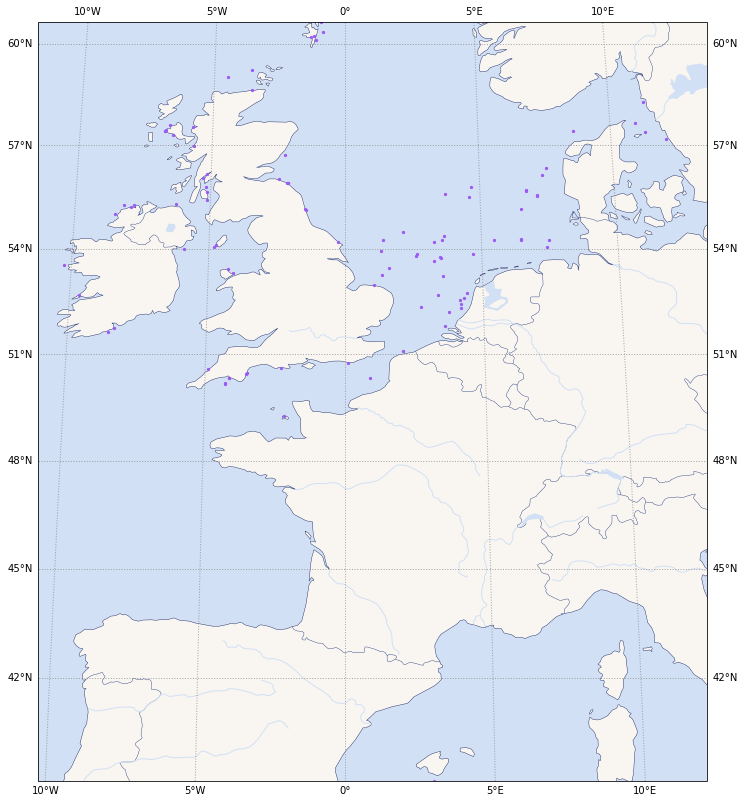

In [11]:
db_plt.plot_points(df)

### Look for OBIS data in a specific <span style='color:#9D59F4'> **polygon** </span>

Let's define our polygon

In [12]:
poly = "POLYGON ((3.0 51.0, 20 51, 20 80, 3 80, 3 51))"  ## you can also always pass in a shapely polygon if you want
filter1 = db.filter_data("scientificName", "=", "Scomber scombrus")

In [13]:
df = db.query("OBIS Biodiversity", poly=poly, filters=[filter1], limit=100)

In [14]:
df.head()

,id,decimalLongitude,decimalLatitude,geometry,timestamp,eventDate,eventTime,depth,date_year,month,...,higherClassification,scientificNameID,minimumDistanceAboveSurfaceInMeters,organismID,node_id,bibliographicCitation,institutionCode,recordedBy,datasetID,institutionID
0,d2e1f7be-1fa1-4044-b7ca-860a69188be1,3.066279,51.731036,POINT (3.06628 51.73104),2007-10-03,2007-10-03,None,NaN,2007,10,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],None,None,ILVO,https://marineinfo.org/id/dataset/4450,None
1,aa702b82-3287-487a-9867-21e8ab74fa10,3.003445,51.494902,POINT (3.00345 51.49490),2008-09-17,2008-09-17,None,NaN,2008,9,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],None,None,ILVO,https://marineinfo.org/id/dataset/4450,None
2,fff7dd1d-fb76-49e7-acb9-82185d1a84f4,6.571200,56.963100,POINT (6.57120 56.96310),2008-09-08,2008-09-08T07:52:00+00:00,07:52:00+00:00,53.0,2008,9,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],North Sea International Bottom Trawl Survey,ICES,North Sea International Bottom Trawl Survey,https://marineinfo.org/id/dataset/2763,None
3,fff79eee-2a3e-4724-b4f0-df47e8e53b6e,6.700000,55.683300,POINT (6.70000 55.68330),1998-08-23,1998-08-23T11:06:00+00:00,11:06:00+00:00,38.0,1998,8,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],North Sea International Bottom Trawl Survey,ICES,North Sea International Bottom Trawl Survey,https://marineinfo.org/id/dataset/2763,None
4,fff040ce-ead4-4df7-9e38-83479f8db455,6.466700,54.283300,POINT (6.46670 54.28330),1991-06-16,1991-06-16T10:07:00+00:00,10:07:00+00:00,38.0,1991,6,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],North Sea International Bottom Trawl Survey,ICES,North Sea International Bottom Trawl Survey,https://marineinfo.org/id/dataset/2763,None


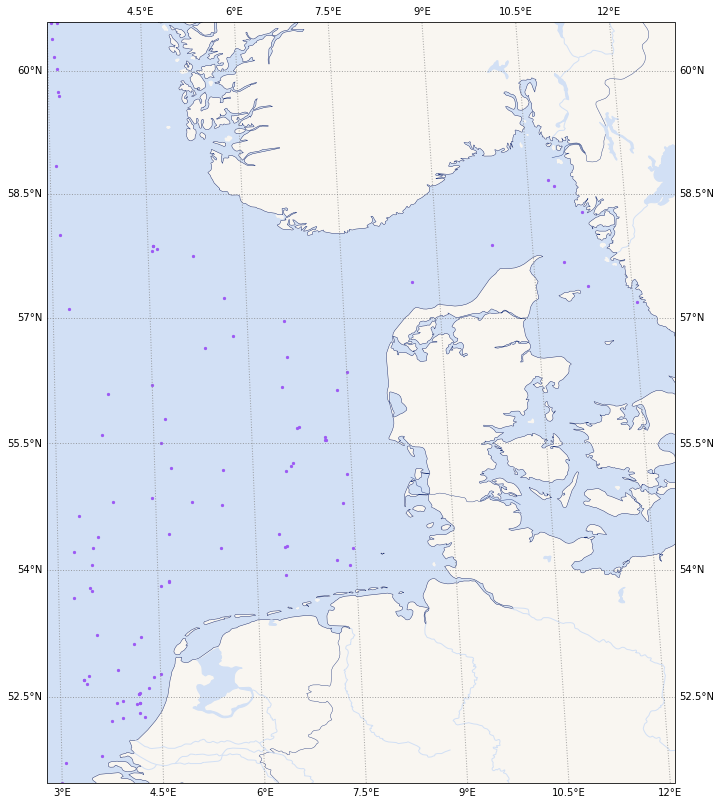

In [15]:
db_plt.plot_points(df)

#### We can also create an interactive plot (will show only when cell is run)

In [16]:
db.plot(df_meas, col="depth")

NameError: name 'df_meas' is not defined